In [12]:
import torch 
from torchvision import transforms , models 
from PIL import Image 
import matplotlib.pyplot as plt
import numpy as np

In [13]:
#selecting GPU if available
device = ("cuda" if torch.cuda.is_available() else "cpu")

In [14]:
#geeting the weights from VGG-19 model
model = models.vgg16(pretrained=True).features
for p in model.parameters():
    p.requires_grad = False
model.to(device)


Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [15]:

def model_activations(input,model):
    #selecting the layers
    layers = {
    '0' : 'conv1_1',
    '5' : 'conv2_1',
    '10': 'conv3_1',
    '19': 'conv4_1',
    '21': 'conv4_2',
    '28': 'conv5_1'
    }
    features = {}
    x = input
    x = x.unsqueeze(0)
    for name,layer in model._modules.items():
        x = layer(x)
        if name in layers:
            features[layers[name]] = x 
    
    return features



In [16]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])


In [17]:
content = Image.open("/content/monaLisa.jpg").convert("RGB")
content = transform(content).to(device)
print("COntent shape => ", content.shape)
style = Image.open("/content/style.jpg").convert("RGB")
style = transform(style).to(device)

COntent shape =>  torch.Size([3, 224, 225])


In [18]:

def imcnvt(image):
    x = image.to("cpu").clone().detach().numpy().squeeze()
    x = x.transpose(1,2,0)
    x = x*np.array((0.5,0.5,0.5)) + np.array((0.5,0.5,0.5))
    return np.clip(x,0,1)


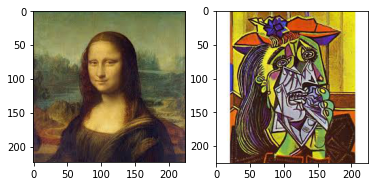

In [19]:

fig, (ax1,ax2) = plt.subplots(1,2)

ax1.imshow(imcnvt(content),label = "Content")
ax2.imshow(imcnvt(style),label = "Style")
plt.show()


In [20]:

def gram_matrix(imgfeature):
    _,d,h,w = imgfeature.size()
    imgfeature = imgfeature.view(d,h*w)
    gram_mat = torch.mm(imgfeature,imgfeature.t())
    
    return gram_mat

In [21]:

target = content.clone().requires_grad_(True).to(device)

#set device to cuda if available
print("device = ",device)


device =  cuda


epoch  10   tensor(5.9002e+15, device='cuda:0', grad_fn=<AddBackward0>)
epoch  20   tensor(4.1195e+15, device='cuda:0', grad_fn=<AddBackward0>)
epoch  30   tensor(2.7577e+15, device='cuda:0', grad_fn=<AddBackward0>)
epoch  40   tensor(1.8305e+15, device='cuda:0', grad_fn=<AddBackward0>)
epoch  50   tensor(1.1898e+15, device='cuda:0', grad_fn=<AddBackward0>)
epoch  60   tensor(7.7065e+14, device='cuda:0', grad_fn=<AddBackward0>)
epoch  70   tensor(5.3233e+14, device='cuda:0', grad_fn=<AddBackward0>)
epoch  80   tensor(4.1255e+14, device='cuda:0', grad_fn=<AddBackward0>)
epoch  90   tensor(3.4932e+14, device='cuda:0', grad_fn=<AddBackward0>)
epoch  100   tensor(3.0813e+14, device='cuda:0', grad_fn=<AddBackward0>)


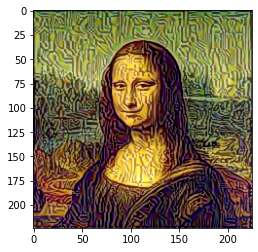

epoch  110   tensor(2.7758e+14, device='cuda:0', grad_fn=<AddBackward0>)
epoch  120   tensor(2.5407e+14, device='cuda:0', grad_fn=<AddBackward0>)
epoch  130   tensor(2.3538e+14, device='cuda:0', grad_fn=<AddBackward0>)
epoch  140   tensor(2.1990e+14, device='cuda:0', grad_fn=<AddBackward0>)
epoch  150   tensor(2.0669e+14, device='cuda:0', grad_fn=<AddBackward0>)
epoch  160   tensor(1.9523e+14, device='cuda:0', grad_fn=<AddBackward0>)
epoch  170   tensor(1.8509e+14, device='cuda:0', grad_fn=<AddBackward0>)
epoch  180   tensor(1.7598e+14, device='cuda:0', grad_fn=<AddBackward0>)
epoch  190   tensor(1.6772e+14, device='cuda:0', grad_fn=<AddBackward0>)
epoch  200   tensor(1.6017e+14, device='cuda:0', grad_fn=<AddBackward0>)


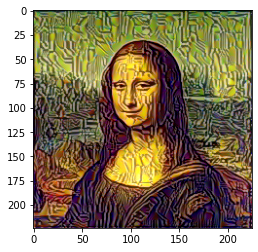

epoch  210   tensor(1.5322e+14, device='cuda:0', grad_fn=<AddBackward0>)
epoch  220   tensor(1.4679e+14, device='cuda:0', grad_fn=<AddBackward0>)
epoch  230   tensor(1.4080e+14, device='cuda:0', grad_fn=<AddBackward0>)
epoch  240   tensor(1.3519e+14, device='cuda:0', grad_fn=<AddBackward0>)
epoch  250   tensor(1.2994e+14, device='cuda:0', grad_fn=<AddBackward0>)
epoch  260   tensor(1.2500e+14, device='cuda:0', grad_fn=<AddBackward0>)
epoch  270   tensor(1.2035e+14, device='cuda:0', grad_fn=<AddBackward0>)
epoch  280   tensor(1.1596e+14, device='cuda:0', grad_fn=<AddBackward0>)
epoch  290   tensor(1.1181e+14, device='cuda:0', grad_fn=<AddBackward0>)
epoch  300   tensor(1.0789e+14, device='cuda:0', grad_fn=<AddBackward0>)


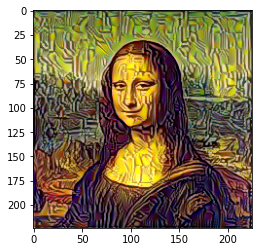

epoch  310   tensor(1.0418e+14, device='cuda:0', grad_fn=<AddBackward0>)
epoch  320   tensor(1.0067e+14, device='cuda:0', grad_fn=<AddBackward0>)
epoch  330   tensor(9.7332e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  340   tensor(9.4162e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  350   tensor(9.1143e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  360   tensor(8.8270e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  370   tensor(8.5536e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  380   tensor(8.2934e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  390   tensor(8.0457e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  400   tensor(7.8096e+13, device='cuda:0', grad_fn=<AddBackward0>)


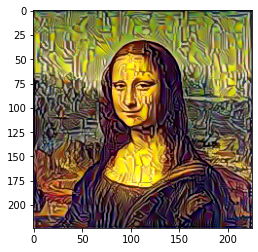

epoch  410   tensor(7.5844e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  420   tensor(7.3689e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  430   tensor(7.1628e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  440   tensor(6.9655e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  450   tensor(6.7769e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  460   tensor(6.5962e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  470   tensor(6.4232e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  480   tensor(6.2572e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  490   tensor(6.0979e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  500   tensor(5.9449e+13, device='cuda:0', grad_fn=<AddBackward0>)


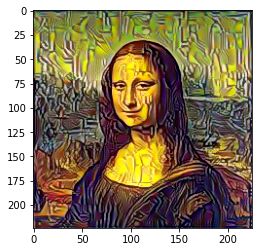

epoch  510   tensor(5.7978e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  520   tensor(5.6566e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  530   tensor(5.5210e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  540   tensor(5.3904e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  550   tensor(5.2649e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  560   tensor(5.1442e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  570   tensor(5.0280e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  580   tensor(4.9159e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  590   tensor(4.8078e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  600   tensor(4.7035e+13, device='cuda:0', grad_fn=<AddBackward0>)


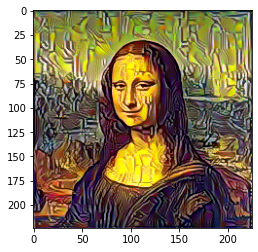

epoch  610   tensor(4.6028e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  620   tensor(4.5055e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  630   tensor(4.4114e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  640   tensor(4.3206e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  650   tensor(4.2331e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  660   tensor(4.1486e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  670   tensor(4.0671e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  680   tensor(3.9880e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  690   tensor(3.9115e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  700   tensor(3.8374e+13, device='cuda:0', grad_fn=<AddBackward0>)


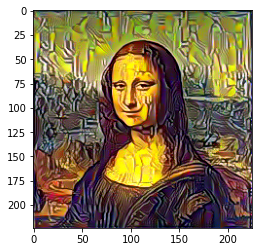

epoch  710   tensor(3.7655e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  720   tensor(3.6958e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  730   tensor(3.6282e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  740   tensor(3.5628e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  750   tensor(3.4993e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  760   tensor(3.4379e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  770   tensor(3.3782e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  780   tensor(3.3205e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  790   tensor(3.2645e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  800   tensor(3.2102e+13, device='cuda:0', grad_fn=<AddBackward0>)


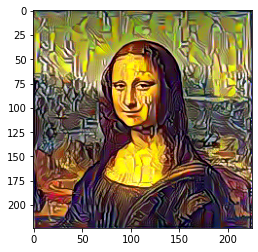

epoch  810   tensor(3.1574e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  820   tensor(3.1063e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  830   tensor(3.0568e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  840   tensor(3.0086e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  850   tensor(2.9617e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  860   tensor(2.9160e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  870   tensor(2.8714e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  880   tensor(2.8281e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  890   tensor(2.7860e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  900   tensor(2.7449e+13, device='cuda:0', grad_fn=<AddBackward0>)


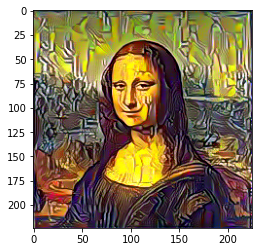

epoch  910   tensor(2.7050e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  920   tensor(2.6660e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  930   tensor(2.6281e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  940   tensor(2.5911e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  950   tensor(2.5550e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  960   tensor(2.5197e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  970   tensor(2.4853e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  980   tensor(2.4517e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  990   tensor(2.4190e+13, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1000   tensor(2.3871e+13, device='cuda:0', grad_fn=<AddBackward0>)


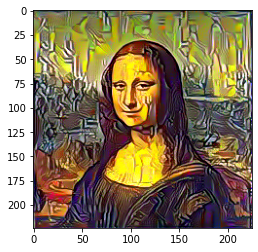

In [22]:

style_features = model_activations(style,model)
content_features = model_activations(content,model)

style_wt_meas = {"conv1_1" : 0.2, 
                 "conv2_1" : 0.2,
                 "conv3_1" : 0.2,
                 "conv4_1" : 0.2,
                 "conv5_1" : 0.2}

style_grams = {layer:gram_matrix(style_features[layer]) for layer in style_features}

content_wt = 100
style_wt = 1e6

print_after = 100
epochs = 1000
optimizer = torch.optim.Adam([target],lr=0.005)

for i in range(1,epochs+1):
    target_features = model_activations(target,model)
    content_loss = torch.mean((content_features['conv4_2']-target_features['conv4_2'])**2)

    style_loss = 0
    for layer in style_wt_meas:
        style_gram = style_grams[layer]
        target_gram = target_features[layer]
        _,d,w,h = target_gram.shape
        target_gram = gram_matrix(target_gram)

        style_loss += (style_wt_meas[layer]*torch.mean((target_gram-style_gram)**2))/d*w*h
    
    total_loss = content_wt*content_loss + style_wt*style_loss 
    
    #printing epoch and the loss
    if i%10==0:       
        print("epoch ",i," ", total_loss)
    
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()
    
    if i%print_after == 0:
        plt.imshow(imcnvt(target),label="Epoch "+str(i))
        plt.show()
        check = plt.imsave(str(i)+'.png',imcnvt(target),format='png')
        #check.savefig(r'\content\test.png')
